### Como mensurar o impacto de diferentes escalas em uma regressão linear?

![image](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*HW7-kYjj6RKwrO-5WTLkDA.png)

#### Dados

### Caso 2D

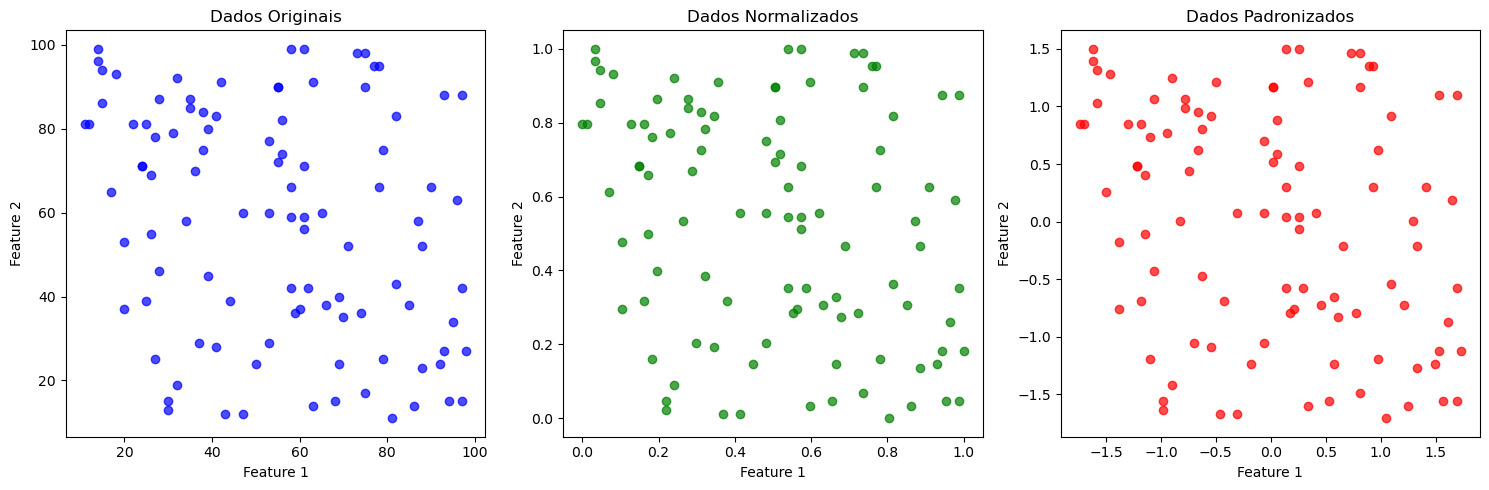

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dados de exemplo
data = np.random.randint(low=10, high=100, size=(100, 2))

# Normalização
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

# Padronização
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)

# Visualização dos dados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.7)
plt.title("Dados Originais")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 3, 2)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], color='green', alpha=0.7)
plt.title("Dados Normalizados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 3, 3)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], color='red', alpha=0.7)
plt.title("Dados Padronizados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


### Caso 1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dados de exemplo em uma dimensão
data = np.random.lognormal(mean=2., sigma=0.5, size=(100, 1))

# Normalização
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

# Padronização
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)

# Visualização dos dados
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.title("Dados Originais")
plt.xlabel("Feature 1")
plt.ylabel("Frequência")

plt.subplot(1, 3, 2)
plt.hist(data_normalized, bins=20, color='green', alpha=0.7)
plt.title("Dados Normalizados")
plt.xlabel("Feature 1")
plt.ylabel("Frequência")

plt.subplot(1, 3, 3)
plt.hist(data_standardized, bins=20, color='red', alpha=0.7)
plt.title("Dados Padronizados")
plt.xlabel("Feature 1")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


#### Exemplo 01 - Cálculo de benefício (bônus) empresarial

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Gerar dados fictícios
np.random.seed(0)
dados = {
    'Idade': np.random.randint(18, 65, 100),  # Idade em anos
    'Salario': np.random.randint(20000, 150000, 100)  # Salário em centavos
}
df = pd.DataFrame(dados)

In [ ]:
# Variável dependente aleatória (algum valor relacionado à idade e salário)
df['Pontuacao'] = df['Idade'] * 3 + df['Salario'] * 0.01 + np.random.normal(0, 50, size=100)

# Dividir os dados em treino e teste
X = df[['Idade', 'Salario']]
y = df['Pontuacao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo sem normalização
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, pred1)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modelo com normalização
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, pred2)

In [ ]:
# Plotar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Modelo Sem Normalização')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred2, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Modelo Com Normalização')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.tight_layout()
plt.show()

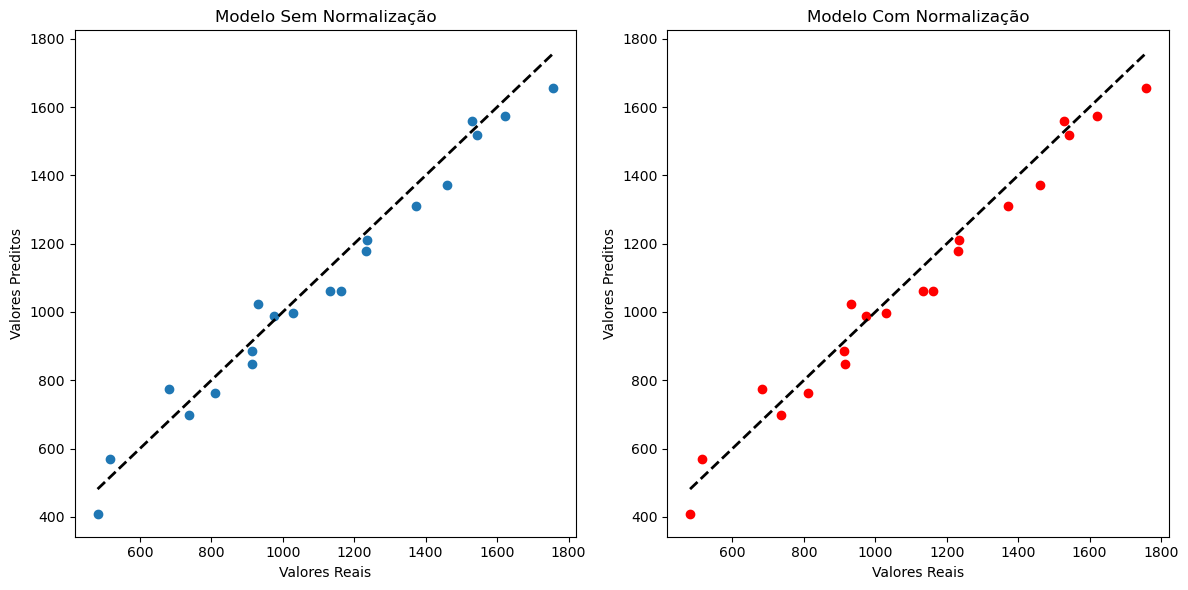

Erro Quadrático Médio sem normalização: 3987.47
Erro Quadrático Médio com normalização: 3987.47


In [18]:
# Imprimir os erros de predição
print(f"Erro Quadrático Médio sem normalização: {mse1:.2f}")
print(f"Erro Quadrático Médio com normalização: {mse2:.2f}")

#### Exemplo 2

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Gerar dados fictícios
np.random.seed(0)
dados = {
    'Idade': np.random.randint(20, 70, 100),  # Idades entre 20 e 70 anos
    'Salario': np.random.randint(2000, 10000, 100)  # Salários entre R$2000 e R$10000
}
df = pd.DataFrame(dados)

# Dividir os dados em treino e teste
X = df[['Idade', 'Salario']]
y = np.random.randint(0, 100, 100)  # Variável dependente aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Modelo com dados não normalizados
model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, pred1)

In [4]:
# Normalizar os dados de salário
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Salario'] = scaler.fit_transform(X_train[['Salario']])
X_test_scaled['Salario'] = scaler.transform(X_test[['Salario']])

# Modelo com dados normalizados
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
pred2 = model2.predict(X_test_scaled)
mse2 = mean_squared_error(y_test, pred2)

In [5]:
# Resultados
print(f"MSE do modelo com variáveis em escalas diferentes: {mse1}")
print(f"MSE do modelo com variáveis normalizadas: {mse2}")

MSE do modelo com variáveis em escalas diferentes: 849.9197361453944
MSE do modelo com variáveis normalizadas: 849.9197361453944


In [6]:
model1.coef_

array([-0.16147098, -0.00207108])

In [7]:
model2.coef_

array([-0.16147098, -4.87983827])

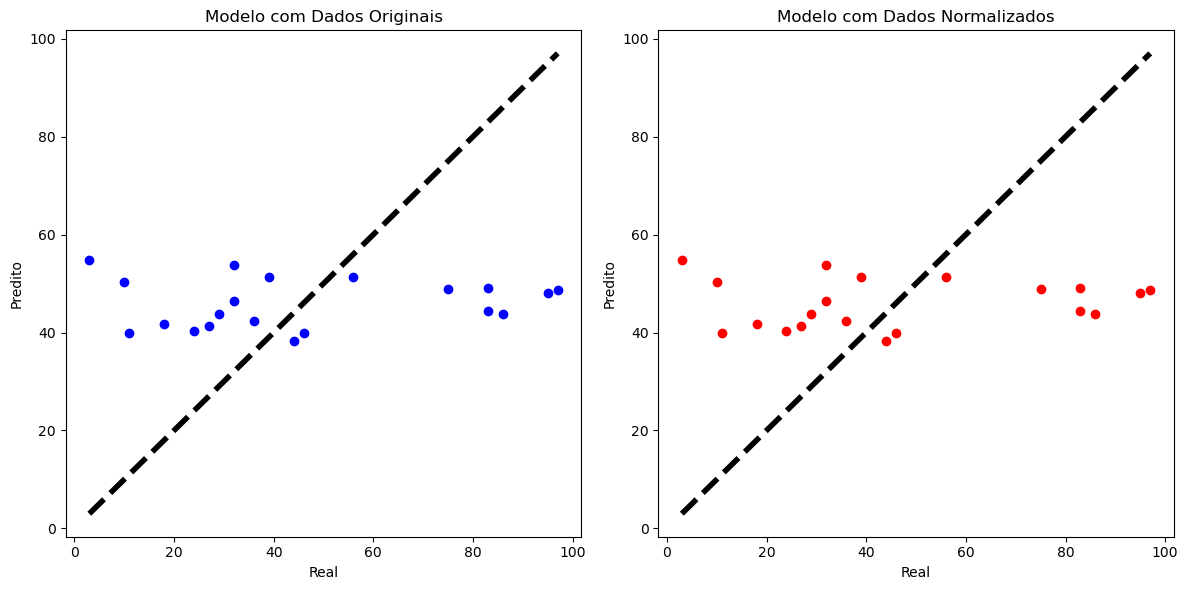

In [10]:
# Plotar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred1, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Modelo com Dados Originais')

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred2, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Modelo com Dados Normalizados')

plt.tight_layout()
plt.show()

### Exemplo 2

In [16]:
model1.coef_

array([278.35293254,  -1.79466276])

In [17]:
model2.coef_

array([  3887.35934048, -64643.24954082])